In [1]:
import numpy as np
import matplotlib.pyplot as plt

import requests
import pandas as pd
# from astropy.coordinates import angular_separation

# Test Oblateness vs coords

In [2]:
ec_lon = np.linspace(0,360,num=360)
ec_lat = np.linspace(-90,90,num=180)

xv, yv = np.meshgrid(ec_lon, ec_lat, indexing='ij')

In [3]:
# sep = angular_separation( np.radians(xv), np.radians(yv), np.radians(spin[0]), np.radians(spin[1]))

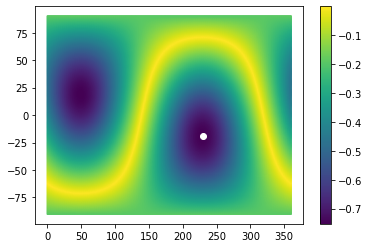

In [4]:
spin = np.array([230,-19])
ratio = .5

cosE = np.sin(np.radians(yv))*np.sin(np.radians(spin[1]))  + \
       np.cos(np.radians(yv))*np.cos(np.radians(spin[1]))*np.cos(np.radians(xv-spin[0]))

sep = np.degrees(np.arccos(cosE)) 

fig, ax = plt.subplots() #1, 2, figsize=(15,5))

# im = ax.scatter(xv, yv, s=1, c=np.degrees(np.arccos(cosE)))
# im = ax.scatter(xv, yv, s=1, c=sep)
# im = ax.scatter(xv, yv, s=1, c=cosE)

vmin, vmax = 0, np.max([1,ratio])

mag = 2.5*np.log10( (1 - (1-ratio)*np.abs(cosE)) )

im = ax.scatter(xv, yv, s=1, c=mag )#, vmin=vmin, vmax=vmax)
ax.scatter(spin[0], spin[1], color='white')

fig.colorbar(im)


# im = ax[0].scatter(xv, yv, s=1, c=ratio*np.abs(cosE), vmin=vmin, vmax=vmax)
# ax[0].scatter(spin[0], spin[1], color='white')

# im = ax[1].scatter(xv, yv, s=1, c=np.abs(cosE), vmin=vmin, vmax=vmax)
# ax[1].scatter(spin[0], spin[1], color='white')

fig.savefig('/home/bcarry/mag_var_from_pole.png')

# Query API SSO

lots of obs

9857
265
22149
9799


In [ ]:
r = requests.post(
  'https://fink-portal.org/api/v1/sso',
  json={
    'n_or_d': '4243,1437,26818,9799,3012,24244,22149,265,4209,9857',
    'output-format': 'json'
  }
)

pdf = pd.read_json(io.BytesIO(r.content))

In [18]:
# get data for object 8467
r = requests.post(
  'https://fink-portal.org/api/v1/sso',
  json={
    'n_or_d': '4243',
    'output-format': 'json'
  }
)

# Format output in a DataFrame
data = pd.read_json(r.text)

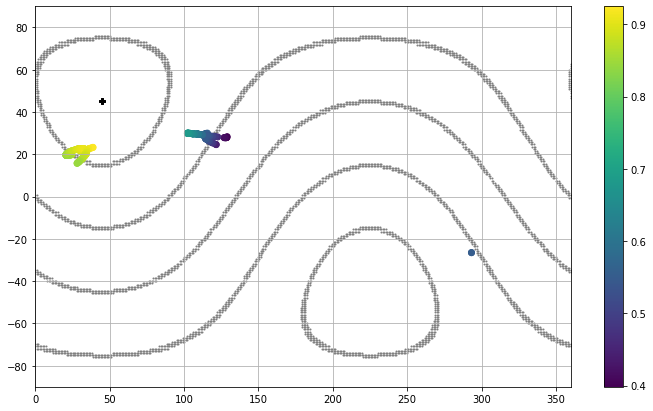

In [19]:
show = True

fig, ax = plt.subplots(figsize=(12,7)) 


# Choose & Plot spin
spin = np.array([45,45])
ratio = 1
ax.scatter(spin[0], spin[1], color='black', marker='P')

# Distance grid
if show:
    cosE = np.sin(np.radians(yv))*np.sin(np.radians(spin[1]))  + \
           np.cos(np.radians(yv))*np.cos(np.radians(spin[1]))*np.cos(np.radians(xv-spin[0]))
    sep = np.degrees(np.arccos(cosE)) 

    for sep_ang in [30,60,90,120,150]:
        t = np.where( (sep>(sep_ang-1)) & (sep<(sep_ang+1)) )
        im = ax.scatter(xv[t], yv[t], s=1, color='gray')

        
# Angular distance
cosE = np.sin(np.radians(data['i:dec']))*np.sin(np.radians(spin[1]))  + \
       np.cos(np.radians(data['i:dec']))*np.cos(np.radians(spin[1]))*np.cos(np.radians(data['i:ra']-spin[0]))
# im = ax.scatter( data['i:ra'], data['i:dec'], c=np.abs(np.degrees(np.arccos(cosE))) )
im = ax.scatter( data['i:ra'], data['i:dec'], c=np.abs(cosE) )




# EC plane
# xx = np.linspace(0,360,num=360)
# ax.plot( xx, 23.4*np.sin(np.radians(xx)), color='gray')

ax.set_xlim(0,360)
ax.set_ylim(-90,90)
ax.grid()

fig.colorbar(im)


In [ ]:
xv[t30]